In [8]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('SP500_for_practice_csv.csv')
df.head(10)

,Date,SP500,SP500_%Change
0,1995/1/3,459.11,NaN
1,1995/1/4,460.71,0.348500
2,1995/1/5,460.34,-0.080311
3,1995/1/6,460.68,0.073858
4,1995/1/9,460.83,0.032561
5,1995/1/10,461.68,0.184450
6,1995/1/11,461.66,-0.004332
7,1995/1/12,461.64,-0.004332
8,1995/1/13,465.97,0.937960
9,1995/1/16,469.38,0.731807


In [7]:
df_no_date = df.drop(['Date'], axis = 1)
df_no_date

,SP500,SP500_%Change
0,459.11,NaN
1,460.71,0.348500
2,460.34,-0.080311
3,460.68,0.073858
4,460.83,0.032561
...,...,...
6400,"3,112.35",-0.336870
6401,"3,193.93",2.621170
6402,"3,232.39",1.204159
6403,"3,207.18",-0.779918


In [74]:
#Use .dropna() to drop the index with missing values.
#df_no_date.iloc[0, 1]
df_no_date.dropna(inplace = True)
df_no_date

,SP500,SP500_%Change
1,460.71,0.348500
2,460.34,-0.080311
3,460.68,0.073858
4,460.83,0.032561
5,461.68,0.184450
...,...,...
6400,"3,112.35",-0.336870
6401,"3,193.93",2.621170
6402,"3,232.39",1.204159
6403,"3,207.18",-0.779918


In [92]:
#Use the shorter dataset for demo
df_demo = df_no_date.head(20)
df_demo

,SP500,SP500_%Change
1,460.71,0.348500
2,460.34,-0.080311
3,460.68,0.073858
4,460.83,0.032561
5,461.68,0.184450
6,461.66,-0.004332
7,461.64,-0.004332
8,465.97,0.937960
9,469.38,0.731807
10,470.05,0.142741


pd.date_range()

In [93]:
#Create a new range of datetime
date_range = pd.date_range(start = "1995-01-04", end = "1995-01-31", freq = 'B') #Business date, so holidays will be skipped
date_range

DatetimeIndex(['1995-01-04', '1995-01-05', '1995-01-06', '1995-01-09',
               '1995-01-10', '1995-01-11', '1995-01-12', '1995-01-13',
               '1995-01-16', '1995-01-17', '1995-01-18', '1995-01-19',
               '1995-01-20', '1995-01-23', '1995-01-24', '1995-01-25',
               '1995-01-26', '1995-01-27', '1995-01-30', '1995-01-31'],
              dtype='datetime64[ns]', freq='B')

In [104]:
#Set the date range as index
df_demo_i = df_demo.set_index(date_range)
print(df_demo_i)

             SP500  SP500_%Change
1995-01-04  460.71       0.348500
1995-01-05  460.34      -0.080311
1995-01-06  460.68       0.073858
1995-01-09  460.83       0.032561
1995-01-10  461.68       0.184450
1995-01-11  461.66      -0.004332
1995-01-12  461.64      -0.004332
1995-01-13  465.97       0.937960
1995-01-16  469.38       0.731807
1995-01-17  470.05       0.142741
1995-01-18  469.72      -0.070205
1995-01-19  466.95      -0.589713
1995-01-20  464.78      -0.464718
1995-01-23  465.81       0.221610
1995-01-24  465.86       0.010734
1995-01-25  467.44       0.339158
1995-01-26  468.32       0.188259
1995-01-27  470.39       0.442005
1995-01-30  468.51      -0.399668
1995-01-31  470.42       0.407675


In [95]:
#If one hopes not to keep datetime as index, reset it
df_demo_no_i = df_demo_i.reset_index()

In [96]:
print(df_demo_no_i)

        index   SP500  SP500_%Change
0  1995-01-04  460.71       0.348500
1  1995-01-05  460.34      -0.080311
2  1995-01-06  460.68       0.073858
3  1995-01-09  460.83       0.032561
4  1995-01-10  461.68       0.184450
5  1995-01-11  461.66      -0.004332
6  1995-01-12  461.64      -0.004332
7  1995-01-13  465.97       0.937960
8  1995-01-16  469.38       0.731807
9  1995-01-17  470.05       0.142741
10 1995-01-18  469.72      -0.070205
11 1995-01-19  466.95      -0.589713
12 1995-01-20  464.78      -0.464718
13 1995-01-23  465.81       0.221610
14 1995-01-24  465.86       0.010734
15 1995-01-25  467.44       0.339158
16 1995-01-26  468.32       0.188259
17 1995-01-27  470.39       0.442005
18 1995-01-30  468.51      -0.399668
19 1995-01-31  470.42       0.407675


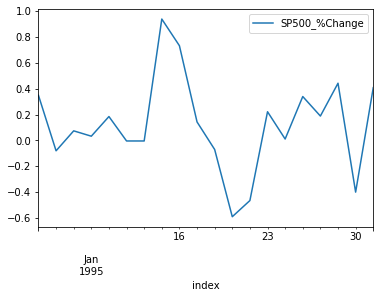

In [36]:
#Plot
%matplotlib inline
df_demo_no_i.plot(x = 'index')

In [97]:
#Choose a shorter dataset (again)
#When df is not indexed with datetime
df_demo_no_i_2 = df_demo_no_i[df_demo_no_i['index'] >= "1995-01-20"]

#When indexed with datetime
df_demo_i_2 = df_demo_i["1995-01-20":"1995-01-31"]

In [98]:
print(df_demo_no_i_2)
print(df_demo_i_2)

        index   SP500  SP500_%Change
12 1995-01-20  464.78      -0.464718
13 1995-01-23  465.81       0.221610
14 1995-01-24  465.86       0.010734
15 1995-01-25  467.44       0.339158
16 1995-01-26  468.32       0.188259
17 1995-01-27  470.39       0.442005
18 1995-01-30  468.51      -0.399668
19 1995-01-31  470.42       0.407675
             SP500  SP500_%Change
1995-01-20  464.78      -0.464718
1995-01-23  465.81       0.221610
1995-01-24  465.86       0.010734
1995-01-25  467.44       0.339158
1995-01-26  468.32       0.188259
1995-01-27  470.39       0.442005
1995-01-30  468.51      -0.399668
1995-01-31  470.42       0.407675


Use .asfreq() to adjust the frequency of original data

In [99]:
#Demo dataframe for this function
df_demo_i

,SP500,SP500_%Change
1995-01-04,460.71,0.348500
1995-01-05,460.34,-0.080311
1995-01-06,460.68,0.073858
1995-01-09,460.83,0.032561
1995-01-10,461.68,0.184450
1995-01-11,461.66,-0.004332
1995-01-12,461.64,-0.004332
1995-01-13,465.97,0.937960
1995-01-16,469.38,0.731807
1995-01-17,470.05,0.142741


In [105]:
#Daily frequency: Unlike business day, holidays will be counted in this case
daily = df_demo_i.asfreq('D', method = 'pad')
print(daily)

             SP500  SP500_%Change
1995-01-04  460.71       0.348500
1995-01-05  460.34      -0.080311
1995-01-06  460.68       0.073858
1995-01-07  460.68       0.073858
1995-01-08  460.68       0.073858
1995-01-09  460.83       0.032561
1995-01-10  461.68       0.184450
1995-01-11  461.66      -0.004332
1995-01-12  461.64      -0.004332
1995-01-13  465.97       0.937960
1995-01-14  465.97       0.937960
1995-01-15  465.97       0.937960
1995-01-16  469.38       0.731807
1995-01-17  470.05       0.142741
1995-01-18  469.72      -0.070205
1995-01-19  466.95      -0.589713
1995-01-20  464.78      -0.464718
1995-01-21  464.78      -0.464718
1995-01-22  464.78      -0.464718
1995-01-23  465.81       0.221610
1995-01-24  465.86       0.010734
1995-01-25  467.44       0.339158
1995-01-26  468.32       0.188259
1995-01-27  470.39       0.442005
1995-01-28  470.39       0.442005
1995-01-29  470.39       0.442005
1995-01-30  468.51      -0.399668
1995-01-31  470.42       0.407675


             SP500  SP500_%Change
1995-01-08  460.68       0.073858
1995-01-15  465.97       0.937960
1995-01-22  464.78      -0.464718
1995-01-29  470.39       0.442005


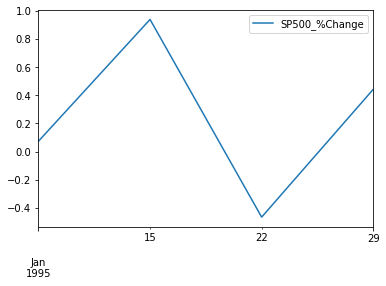

In [106]:
#Weekly frequency
weekly = df_demo_i.asfreq('W', method = 'pad')
print(weekly) #Only the data located in the end of the week will be returned

%matplotlib inline
weekly.plot()

In [108]:
#Hourly
hourly = daily.asfreq('H', method = 'pad')
print(hourly) 

                      SP500  SP500_%Change
1995-01-04 00:00:00  460.71       0.348500
1995-01-04 01:00:00  460.71       0.348500
1995-01-04 02:00:00  460.71       0.348500
1995-01-04 03:00:00  460.71       0.348500
1995-01-04 04:00:00  460.71       0.348500
...                     ...            ...
1995-01-30 20:00:00  468.51      -0.399668
1995-01-30 21:00:00  468.51      -0.399668
1995-01-30 22:00:00  468.51      -0.399668
1995-01-30 23:00:00  468.51      -0.399668
1995-01-31 00:00:00  470.42       0.407675

[649 rows x 2 columns]


In [115]:
n = daily.asfreq('H', method = 'pad', normalize = True)
n

,SP500,SP500_%Change
1995-01-04,460.71,0.348500
1995-01-04,460.71,0.348500
1995-01-04,460.71,0.348500
1995-01-04,460.71,0.348500
1995-01-04,460.71,0.348500
...,...,...
1995-01-30,468.51,-0.399668
1995-01-30,468.51,-0.399668
1995-01-30,468.51,-0.399668
1995-01-30,468.51,-0.399668


More parameters for pd.date_range()

In [116]:
#When the start and end date of the range are known
date_range1 = pd.date_range(start = "1995-01-04", end = "1995-02-01", freq = 'D')
date_range1

DatetimeIndex(['1995-01-04', '1995-01-05', '1995-01-06', '1995-01-07',
               '1995-01-08', '1995-01-09', '1995-01-10', '1995-01-11',
               '1995-01-12', '1995-01-13', '1995-01-14', '1995-01-15',
               '1995-01-16', '1995-01-17', '1995-01-18', '1995-01-19',
               '1995-01-20', '1995-01-21', '1995-01-22', '1995-01-23',
               '1995-01-24', '1995-01-25', '1995-01-26', '1995-01-27',
               '1995-01-28', '1995-01-29', '1995-01-30', '1995-01-31',
               '1995-02-01'],
              dtype='datetime64[ns]', freq='D')

In [119]:
#When only the start date and many of date time are known
date_range2 = pd.date_range(start = "1995-01-04", periods = 32, freq = 'D') #32 days  selected strarted from begining day.
date_range2

DatetimeIndex(['1995-01-04', '1995-01-05', '1995-01-06', '1995-01-07',
               '1995-01-08', '1995-01-09', '1995-01-10', '1995-01-11',
               '1995-01-12', '1995-01-13', '1995-01-14', '1995-01-15',
               '1995-01-16', '1995-01-17', '1995-01-18', '1995-01-19',
               '1995-01-20', '1995-01-21', '1995-01-22', '1995-01-23',
               '1995-01-24', '1995-01-25', '1995-01-26', '1995-01-27',
               '1995-01-28', '1995-01-29', '1995-01-30', '1995-01-31',
               '1995-02-01', '1995-02-02', '1995-02-03', '1995-02-04'],
              dtype='datetime64[ns]', freq='D')

In [120]:
#The first 8 hours within 1995-01-04
date_range3 = pd.date_range(start = "1995-01-04", periods = 8, freq = 'H')
date_range3

DatetimeIndex(['1995-01-04 00:00:00', '1995-01-04 01:00:00',
               '1995-01-04 02:00:00', '1995-01-04 03:00:00',
               '1995-01-04 04:00:00', '1995-01-04 05:00:00',
               '1995-01-04 06:00:00', '1995-01-04 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [125]:
#Inverse order of date time range
date_range_inverse = pd.date_range(start = "1995-01-04", periods = 8, freq = 'H')[::-1]
date_range_inverse

DatetimeIndex(['1995-01-04 07:00:00', '1995-01-04 06:00:00',
               '1995-01-04 05:00:00', '1995-01-04 04:00:00',
               '1995-01-04 03:00:00', '1995-01-04 02:00:00',
               '1995-01-04 01:00:00', '1995-01-04 00:00:00'],
              dtype='datetime64[ns]', freq='-1H')

In [124]:
#Generate the random time series data
import numpy as np
rnd = np.random.randint(3, 103, 8) #generate 8 random numbers from 3 to 103
print(rnd)

rand_df = pd.Series(rnd, index = date_range3)
print(rand_df)

[14  9 13 20 49 89 60 24]
1995-01-04 00:00:00    14
1995-01-04 01:00:00     9
1995-01-04 02:00:00    13
1995-01-04 03:00:00    20
1995-01-04 04:00:00    49
1995-01-04 05:00:00    89
1995-01-04 06:00:00    60
1995-01-04 07:00:00    24
Freq: H, dtype: int32
